Here we're going to use the MNIST database. This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

Let's load the dataset first.

**Tasks. Part 0.**

1. First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!

Spoiler alert: Davide's efficiency was ~80%, much worse than ML!

2. Here is how you plot the images and the corresponding labels (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

Ok so the data is simply each pixel value within an 8 x 8 grid. For this analysis, we don't care about the 2-D nature of the image, we can just treat it as an 8 x 8 = 64 dimensional array. So our data have 1797 samples in 64 dimensions.

Then each of the 1797 images has a label.

Here are a few of the images in the dataset:

![Test.png](Test.png)

My guess:

[8 9 8 1 2 6 9  
 1 9 4 0 6 1 7  
 6 9 5 4 4 8 4  
 0 5 6 1 7 9 3  
 2 1 0 8 3 9 6  
 1 1 2 0 5 4 4  
 9 6 2 6 1 0 0]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
digits = datasets.load_digits()
print(digits.images.shape)

(1797, 8, 8)


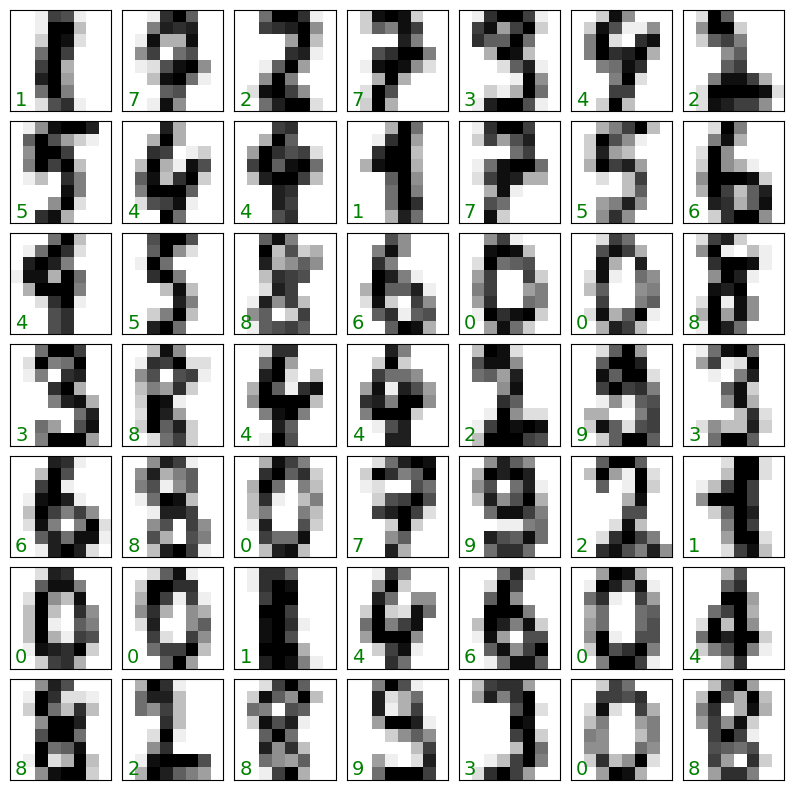

In [6]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0], 100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
print(digits.data.shape)

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[0 1 2 ... 8 9 8]
0


**Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits**

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N = 64$ dimensions! So we need to reduce the dimensionality of the space

3. Use the unsupervised dimensionality reduction technique called Isomap. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N < M$) manyfold. Reduce the MINST dataset. Do some plots to visualize your results

Note. Isomap is very recent. It was introduced by Tenenbaum et al (2000) ---a paper that has something like $1.5$ x $10^4$ citations.

In [8]:
# General variables
x = digits.data
y = digits.target

/home/alessia_pozzi/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/alessia_pozzi/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


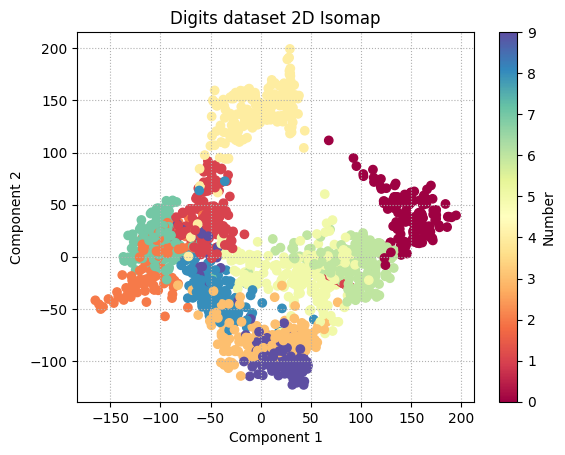

In [9]:
# 2D Isomap on the entire dataset
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(x)
print(digits_transformed.shape)

scatter = plt.scatter(digits_transformed[:, 0], digits_transformed[:, 1], c=y, cmap='Spectral')
plt.colorbar(scatter, label='Number')
plt.title("Digits dataset 2D Isomap")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(linestyle=':')
plt.show()

(500, 2)


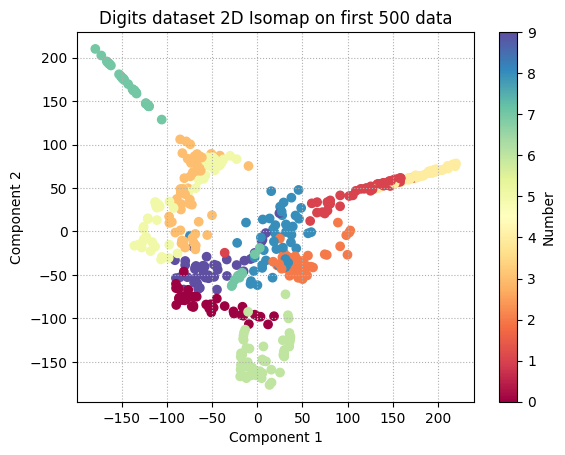

In [10]:
# 2D Isomap on first 500 data
embedding = Isomap(n_components=2)
digits_transformed_500 = embedding.fit_transform(x[:500])
print(digits_transformed_500.shape)

scatter_500 = plt.scatter(digits_transformed_500[:, 0], digits_transformed_500[:, 1], c=y[:500], cmap='Spectral')
plt.colorbar(scatter_500, label='Number')
plt.title("Digits dataset 2D Isomap on first 500 data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(linestyle=':')
plt.show()

/home/alessia_pozzi/.local/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/alessia_pozzi/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 3)


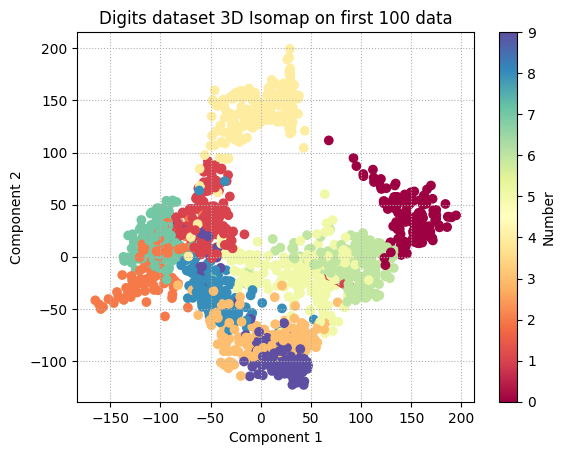

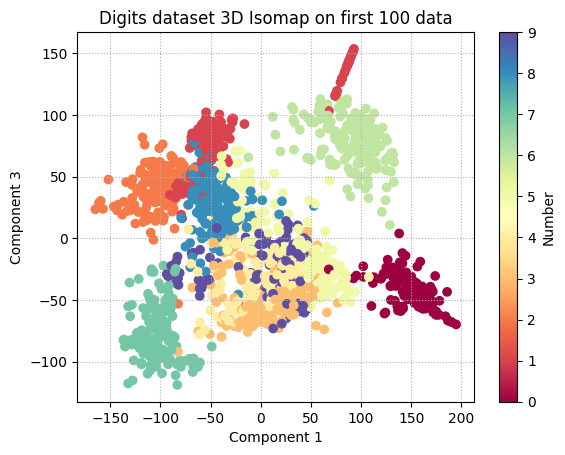

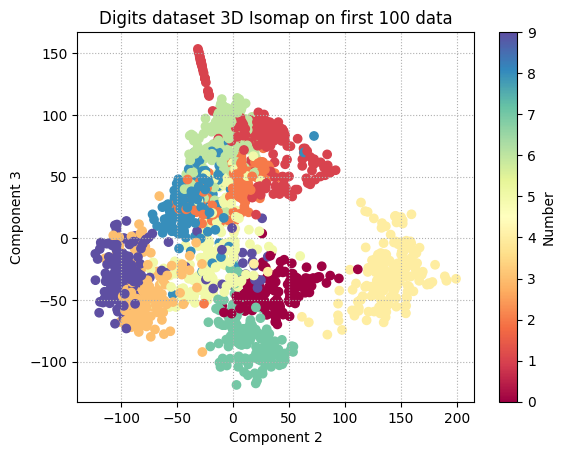

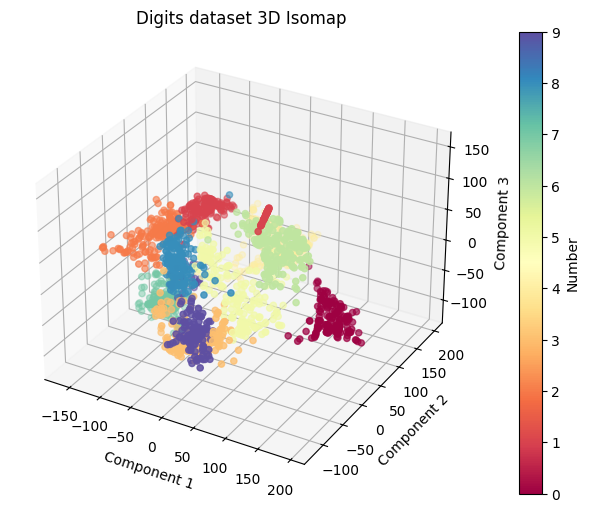

In [17]:
# 3D Isomap on first 100 data
embedding_3 = Isomap(n_components=3)
digits_transformed_3 = embedding_3.fit_transform(x)
print(digits_transformed_3.shape)

# Plot Component 1-2
scatter_3_01 = plt.scatter(digits_transformed_3[:, 0], digits_transformed_3[:, 1], c=y, cmap='Spectral')
plt.colorbar(scatter_3_01, label='Number')
plt.title("Digits dataset 3D Isomap on first 100 data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(linestyle=':')
plt.show()

# Plot Component 1-3
scatter_3_02 = plt.scatter(digits_transformed_3[:, 0], digits_transformed_3[:, 2], c=y, cmap='Spectral')
plt.colorbar(scatter_3_02, label='Number')
plt.title("Digits dataset 3D Isomap on first 100 data")
plt.xlabel("Component 1")
plt.ylabel("Component 3")
plt.grid(linestyle=':')
plt.show()

# Plot Component 2-3
scatter_3_12 = plt.scatter(digits_transformed_3[:, 1], digits_transformed_3[:, 2], c=y, cmap='Spectral')
plt.colorbar(scatter_3_12, label='Number')
plt.title("Digits dataset 3D Isomap on first 100 data")
plt.xlabel("Component 2")
plt.ylabel("Component 3")
plt.grid(linestyle=':')
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(digits_transformed_3[:, 0],
               digits_transformed_3[:, 1],
               digits_transformed_3[:, 2],
               c=y,
               cmap='Spectral')
fig.colorbar(p, label='Number')
ax.set_title("Digits dataset 3D Isomap")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.show()

**Tasks. Part 2. Supervised Learning: Classification on Digits**

Now we want to classify the dataset.

4. Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need sklearn.model_selection.train_test_split.

5. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).

6. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7. The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc. We'll get to those in the coming weeks.

In [12]:
# Split the dataset in a training dataset (80%) and a test dataset (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)

print("Training set dimension: ", x_train.shape, y_train.shape)
print("Test set dimension: ", x_test.shape, y_test.shape)

y_pred_train = clf.predict(x_train)
print("\n Confusion matrix on training set:")
print(confusion_matrix(y_train, y_pred_train))

y_pred_test = clf.predict(x_test)
print("\n Confusion matrix on test set:")
print(confusion_matrix(y_test, y_pred_test))

Training set dimension:  (1437, 64) (1437,)
Test set dimension:  (360, 64) (360,)

 Confusion matrix on training set:
[[145   0   0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 151   0   0   0   0   0   0]
 [  0   0   0   0 138   0   0   0   0   0]
 [  0   0   0   0   0 141   0   0   0   0]
 [  0   0   0   0   0   0 138   0   0   0]
 [  0   0   0   0   0   0   0 147   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 142]]

 Confusion matrix on test set:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  3  0  0  0  0  0  0 26  1]
 [ 0  1  0  2  0  0  0  0  0 35]]


In [13]:
# Logistic Regression
modelLR = LogisticRegression(solver='sag', max_iter = 1000) 
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [14]:
# Predictions
y_pred_train_LR = modelLR.predict(x_train)
y_pred_test_LR = modelLR.predict(x_test)

# Accuracy
acc_train = accuracy_score(y_train, y_pred_train_LR)
acc_test = accuracy_score(y_test, y_pred_test_LR)

print(f"Accuracy on training set:  {acc_train:.4f}")
print(f"Accuracy on validation set: {acc_test:.4f}")

Accuracy on training set:  1.0000
Accuracy on validation set: 0.9639


The Logic Regression has a 100% accuracy on the trainiing set which means that it has correctly identify all trainig examples. The accuracy on the validation set is 96.4% which indicates that the model can be generalise well to unseen data.

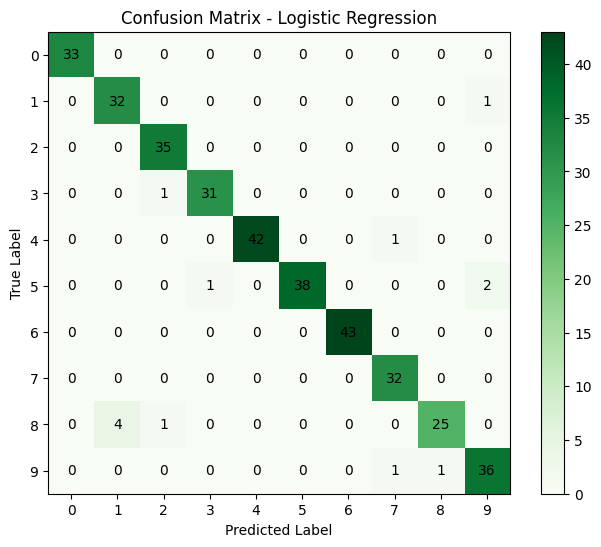

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_LR)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Greens')

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

fig.colorbar(im)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xticklabels(digits.target_names)
ax.set_yticklabels(digits.target_names)
plt.show()

Confused number: 
- 4 <-> 1
- 5 <-> 3
- 5 <-> 7
- 5 <-> 9
- 7 <-> 9
- 8 <-> 1
- 8 <-> 2
- 9 <-> 4
- 9 <-> 5
- 9 <-> 8